## Bank customer churn Prediction Model

In this project, we build an ANN model which can predict whether a customer will exit from a Bank or not ( `churn rate at bank` ). 

- ML Algorithm : **ANN** (Artificial Neural Network)
- **Dataset :** available on [kaggle](). We also provide it in the folder that contains this notebook.
- Then we use different techniques to `handle imbalanced data`.
- These techniques are :**undersampling of the majority class**, **overersampling of the minority class**, **SMOTE**, **Ensemble with undersampling**
- 

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

2023-10-02 03:07:44.018855: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-02 03:07:44.020383: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 03:07:44.056232: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 03:07:44.056993: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 03:07:44.738522: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### 1 - Load Dataset

In [2]:
df = pd.read_csv("../../dataset/bank_churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

### 2 - Data Exploration & Transformation

In [4]:
# check types of each column
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
## check for null datapoints
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
## Let's remove customerId & surname from dataset : they are not usefull for prediction

df.drop(['CustomerId','Surname'], axis='columns', inplace=True)
df.sample(3)

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8446,8447,691,France,Female,33,6,0.0,2,1,0,164074.89,0
9397,9398,766,France,Female,52,7,92510.9,2,0,1,66193.61,0
8725,8726,633,Spain,Male,27,3,0.0,2,1,0,44008.91,0


In [7]:
## Quick visualization :
tenure_churned_customers = df[df['Exited'] == 1].Tenure # leaving customers
tenure_no_churned_customers = df[df['Exited'] == 0].Tenure # not leaving customers

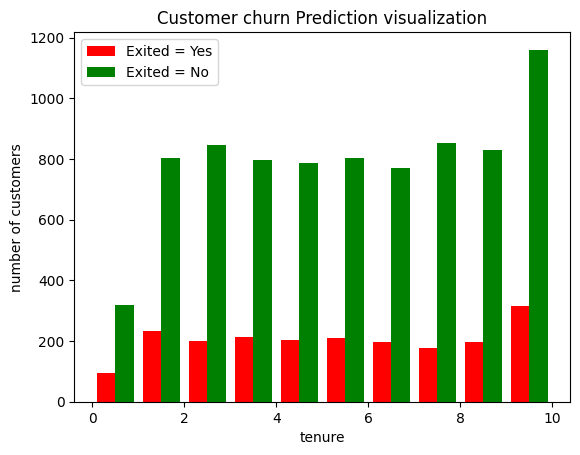

In [8]:
## churn based on Tenure
plt.xlabel('tenure')
plt.ylabel('number of customers')
plt.title('Customer churn Prediction visualization')
plt.hist([tenure_churned_customers, tenure_no_churned_customers], color=['red', 'green'], label=['Exited = Yes','Exited = No'])
plt.legend()

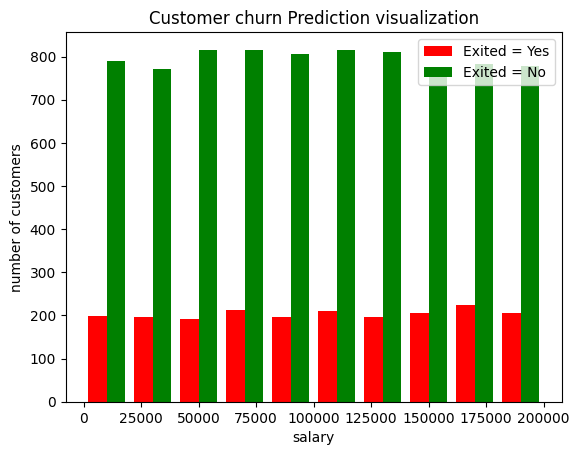

In [9]:
## churn based on customer EstimatedSalary

salary_churned_customers = df[df['Exited'] == 1].EstimatedSalary# leaving customers
salary_no_churned_customers = df[df['Exited'] == 0].EstimatedSalary # not leaving customers

plt.xlabel('salary')
plt.ylabel('number of customers')
plt.title('Customer churn Prediction visualization')
plt.hist([salary_churned_customers, salary_no_churned_customers], color=['red', 'green'], label=['Exited = Yes','Exited = No'])
plt.legend()

In [10]:
# Print unique values of categorical columns
def print_categorical_uniq_column_value(dff):
    for column in dff.columns:
        if dff[column].dtypes=='object':
            print (f'{column} : {dff[column].unique()}')

In [11]:
print_categorical_uniq_column_value(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [12]:
df1 = df.copy()

In [13]:
### Now, only Geography and 'Gender' are string.
# so we can convert them to interger 

In [14]:
## case of gender

df1['Gender'].replace({'Male': 0, 'Female':1}, inplace=True) # male becomes 0, female becomes 1
df1.sample()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3786,3787,710,Germany,1,41,9,149155.53,2,1,0,42131.26,1


In [15]:
## case of Geography : we use one hot encoding; then remove the original column

df2 = pd.get_dummies(data=df1 , columns= ['Geography'] )

df2.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [16]:
## As you can see, the new columns are of type 'bool';
## thus, we need to tuen them to int

cols_to_int = ['Geography_France', 'Geography_Germany', 'Geography_Spain']

for col in cols_to_int:
    df2[col] = np.asarray(df2[col]).astype(np.int64)

df2.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [17]:
for column in df2.columns:
    print (f'{column} : {df2[column].unique()}')

RowNumber : [    1     2     3 ...  9998  9999 10000]
CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443

In [18]:
### Scalling :
### we need to scale values of : CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [19]:
df2.sample(2)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8159,8160,0.222,1,0.094595,0.6,0.000000,0.333333,1,1,0.076481,0,0,0,1
3844,3845,0.662,0,0.270270,0.6,0.612689,0.000000,1,0,0.506589,0,1,0,0


### 3- Train Model using ANN

#### a- Define x, y

In [20]:
x = df2.drop('Exited', axis='columns')
y = df2['Exited']

In [21]:
x.sample(2)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
3760,3761,0.97,0,0.270270,0.7,0.346053,0.000000,0,0,0.879556,0,0,1
7682,7683,0.70,0,0.148649,0.8,0.000000,0.333333,0,1,0.760500,0,0,1


In [22]:
x.sample(2)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
5464,5465,0.412,1,0.243243,0.2,0.534911,0.000000,0,1,0.888380,1,0,0
2831,2832,0.552,1,0.189189,0.0,0.000000,0.333333,0,0,0.935894,1,0,0


In [23]:
y.sample(2)

5555    0
4088    0
Name: Exited, dtype: int64

#### b- Split data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [25]:
x_train.shape

(8000, 13)

In [26]:
x_train.sample()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
4537,4538,0.72,1,0.175676,0.5,0.0,0.333333,1,0,0.047755,0,0,1


#### c - ANN model

In [27]:
model = tf.keras.Sequential([
    keras.layers.Dense(20 , input_shape=(13,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs= 5)

Epoch 1/5
250/250 [==============================] - 1s 963us/step - loss: 19.4202 - accuracy: 0.6777
Epoch 2/5
250/250 [==============================] - 0s 1ms/step - loss: 1.0243 - accuracy: 0.7010
Epoch 3/5
250/250 [==============================] - 0s 885us/step - loss: 0.9383 - accuracy: 0.7107
Epoch 4/5
250/250 [==============================] - 0s 1ms/step - loss: 0.7702 - accuracy: 0.7343
Epoch 5/5
250/250 [==============================] - 0s 882us/step - loss: 0.7808 - accuracy: 0.7420


#### d - Evaluate model

In [28]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.7783 - accuracy: 0.8115


[0.7783252596855164, 0.8115000128746033]

#### e - Make Prediction

In [29]:
yp = model.predict(x_test)
yp[:10]

63/63 [==============================] - 0s 745us/step


array([[0.01756945],
       [0.00055596],
       [0.02160946],
       [0.00300269],
       [0.02931909],
       [0.02399981],
       [0.00655369],
       [0.02129683],
       [0.32272038],
       [0.0163769 ]], dtype=float32)

#### f - Print Classification Report

It will give a statistic on the performance of all the model.
This statistic include : `precision, recall, f1-score, support`

 **Remark :** that yp is a two dimentional array. We need to convert it into one dimentional array

Also, when the value in the array `is less than 0.50`, we replace it by `0`; by `1` if it is `>= 0.5`

In [30]:
y_pred = []
for elment in yp:
    if elment > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1625
           1       0.25      0.00      0.01       375

    accuracy                           0.81      2000
   macro avg       0.53      0.50      0.45      2000
weighted avg       0.71      0.81      0.73      2000



Text(95.72222222222221, 0.5, 'Truth ')

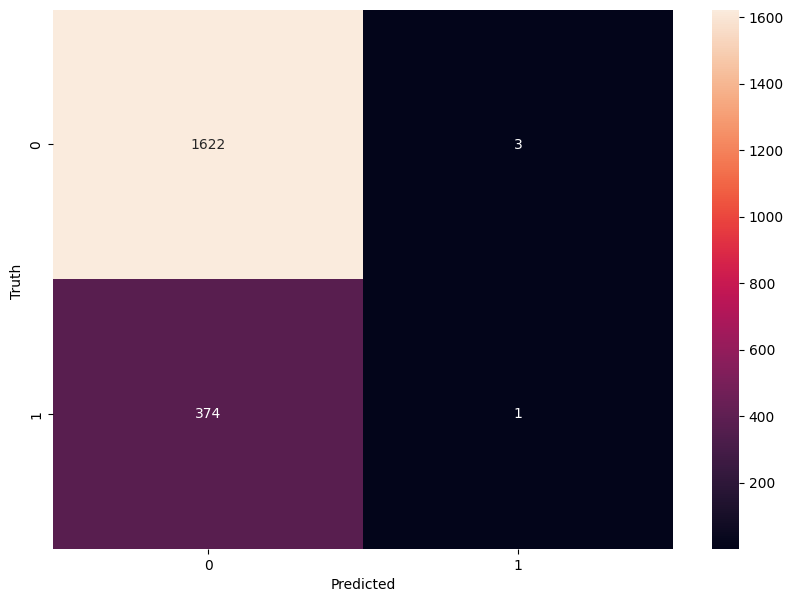

In [32]:
## Pretty visualization

import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth ")

### 4 - Handle imbalanced Data

In classification problems, `Imbalalance data` occurs when the dataset is set with skewed classes. In other words, it is when a class is less represented than an another in a dataset. It is a well known problem in `Churn prediction` problems. 

In our case, we can remark that `class 0` has a large proportion of our dataset and `class 1` has a smaller proportion. Thus, a model that is trained using such dataset will learn more from `class 0` samples than it will does on `class 1` samples.

To handle this, we can use different techniques such as : **undersampling of the majority class**, **overersampling of the minority class**, **SMOTE**, **Ensemble with undersampling**

Here, we've tried all these techniques.

In [33]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(20, input_shape=(13,), activation='relu'),
        #keras.layers.Dense(20, input_shape=(13,), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer = 'adam',
        loss = loss, 
        metrics=['accuracy'],
    )

    if weights == -1:
        model.fit(x_train, y_train, epochs=100)
    else:
        model.fit(x_train, y_train, epochs=100, class_weight = weights) #class_weight = weights is what people often use to tackle imbalenced dataset

    print( model.evaluate(x_test, y_test) )

    y_preds = np.round(model.predict(x_test))

    print("Classification report :")

    print(classification_report(y_test, y_preds))

    return y_preds

In [34]:
y_test.value_counts()

Exited
0    1625
1     375
Name: count, dtype: int64

#### Method 1 : Using Under sampling

In [35]:
# count class
count_class_0, count_class_1 = df1.Exited.value_counts()
count_class_0

7963

In [36]:
count_class_1

2037

In [37]:
#divide by class

df_class_0 = df2[df2['Exited'] == 0]
df_class_1 = df2[df2['Exited'] == 1]

In [38]:
df_class_0.shape

(7963, 14)

In [39]:
df_class_1.shape

(2037, 14)

As we can see, `class_0` is the larger on. So, we will under sampled it such a way that it will have the same shape as `class_1`.

In [40]:
## under sampling 0_class

df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

df_test_under.shape

(4074, 14)

In [41]:
print(df_test_under.Exited.value_counts())

Exited
0    2037
1    2037
Name: count, dtype: int64


In [42]:
x = df_test_under.drop('Exited', axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=15, stratify = y ) # stratify is used to be sure that sample are balanced

In [43]:
print(y_train.value_counts())

Exited
1    1630
0    1629
Name: count, dtype: int64


In [44]:
y_preds_under = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 0s 1ms/step - loss: 59.7242 - accuracy: 0.5103
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8548 - accuracy: 0.5106
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 1.1146 - accuracy: 0.5315
Epoch 4/100
102/102 [==============================] - 0s 965us/step - loss: 0.9428 - accuracy: 0.5284
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8892 - accuracy: 0.5511
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 1.1044 - accuracy: 0.5403
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8714 - accuracy: 0.5677
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 1.3322 - accuracy: 0.5345
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 1.1517 - accuracy: 0.5726
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 1.0162 - acc

#### Methode 2 : Oversampling of minority class

In [45]:
count_class_0, count_class_1

(7963, 2037)

In [46]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True )
df_class_1_over.shape

(7963, 14)

In [47]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
print('Random over-sampling :')
print(df_test_over.Exited.value_counts())

Random over-sampling :
Exited
0    7963
1    7963
Name: count, dtype: int64


In [48]:
x_over = df_test_over.drop('Exited', axis='columns')
y_over = df_test_over['Exited']

x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(x_over,y_over, test_size=0.2, random_state=15, stratify = y_over ) # stratify is used to be sure that sample are balanced ( the class distribution is equal ) 

In [49]:
y_preds_over = ANN(x_train_over, y_train_over, x_test_over, y_test_over, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 37.4067 - accuracy: 0.4967
Epoch 2/100
399/399 [==============================] - 1s 1ms/step - loss: 1.0849 - accuracy: 0.5267
Epoch 3/100
399/399 [==============================] - 1s 1ms/step - loss: 0.8361 - accuracy: 0.5676
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.8491 - accuracy: 0.5703
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.8552 - accuracy: 0.5821
Epoch 6/100
399/399 [==============================] - 1s 1ms/step - loss: 0.8963 - accuracy: 0.5834
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.9038 - accuracy: 0.5844
Epoch 8/100
399/399 [==============================] - 1s 1ms/step - loss: 0.8879 - accuracy: 0.5913
Epoch 9/100
399/399 [==============================] - 1s 1ms/step - loss: 1.0344 - accuracy: 0.5812
Epoch 10/100
399/399 [==============================] - 1s 1ms/step - loss: 0.9318 - accur

#### Methode 3 : SMOTE (Synthetic Minority Over-sampling Technique) - (K-NN )

In [50]:
x_for_smote = df2.drop('Exited', axis='columns')
y_for_smote = df2['Exited']

In [51]:
y_for_smote.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [52]:
### SMOTE needs to be installed using :
# 

In [53]:
from imblearn.over_sampling import SMOTE 

In [54]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_for_smote, y_for_smote)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [55]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_for_smote, y_for_smote)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [56]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size=0.2, random_state=15, stratify = y_sm )

In [57]:
y_train_sm.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [58]:
y_test_sm.value_counts()

Exited
0    1593
1    1593
Name: count, dtype: int64

In [59]:
y_preds_sm = ANN(x_train_sm, y_train_sm, x_test_sm, y_test_sm, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 89.8174 - accuracy: 0.4972
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 1.0042 - accuracy: 0.5447
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.9083 - accuracy: 0.5977
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.9191 - accuracy: 0.6172
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6777 - accuracy: 0.6775
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.7087 - accuracy: 0.6765
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.8554 - accuracy: 0.6548
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.7501 - accuracy: 0.6790
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.7602 - accuracy: 0.6867
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6672 - accur

#### Methode 4 : Use of Ensemble with undersampling

In [60]:
df2.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [61]:
x_ens = df2.drop('Exited', axis='columns')
y_ens = df2['Exited']

In [62]:
x_train_ens, x_test_ens, y_train_ens, y_test_ens = train_test_split(x_ens,y_ens, test_size=0.2, random_state=15, stratify = y_ens ) 

In [63]:
y_train_ens.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [64]:
6370/1630

3.9079754601226995

In [65]:
6370/4 # we'll make 4 batches of class_0

1592.5

In [66]:
df3 = x_train_ens.copy()
df3['Exited'] = y_train_ens

df3_class_0 = df3[df3['Exited'] == 0]
df3_class_1 = df3[df3['Exited'] == 1]

In [67]:
df3_class_0.shape, df3_class_1.shape # class_o is the major class

((6370, 14), (1630, 14))

In [68]:
# define a function to create single sample

def get_train_batch(df_majority, df_minority, start,end):
    df_train = pd.concat([df_majority[ start:end ], df_minority], axis = 0)

    x_train = df_train.drop('Exited', axis='columns')
    y_train = df_train['Exited']

    return x_train, y_train

In [69]:
x_train_ens_1, y_train_ens_1 = get_train_batch(df3_class_0, df3_class_1, 0, 1630)

In [70]:
## Batch 1

y_pred_1 = ANN(x_train_ens_1, y_train_ens_1, x_test_ens, y_test_ens, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 20.4283 - accuracy: 0.5028
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7767 - accuracy: 0.5380
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8455 - accuracy: 0.5175
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.8624 - accuracy: 0.5408
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 1.4589 - accuracy: 0.5212
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 1.4139 - accuracy: 0.5120
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.9473 - accuracy: 0.5564
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.7784 - accuracy: 0.5752
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.7656 - accuracy: 0.5874
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.8529 - accur

In [71]:
1630*2

3260

In [72]:
## Batch 2

x_train_ens_2, y_train_ens_2 = get_train_batch(df3_class_0, df3_class_1, 1630, 3260)
y_pred_2 = ANN(x_train_ens_2, y_train_ens_2, x_test_ens, y_test_ens, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 31.8624 - accuracy: 0.4942
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9418 - accuracy: 0.4880
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 1.2270 - accuracy: 0.4963
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9855 - accuracy: 0.5267
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 1.0078 - accuracy: 0.5350
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 1.7197 - accuracy: 0.5285
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 1.1155 - accuracy: 0.5491
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.9293 - accuracy: 0.5604
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 1.1164 - accuracy: 0.5442
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.8750 - accur

In [73]:
1630*3

4890

In [74]:
## Batch 3

x_train_ens_3, y_train_ens_3 = get_train_batch(df3_class_0, df3_class_1, 3260, 4890)
y_pred_3 = ANN(x_train_ens_3, y_train_ens_3, x_test_ens, y_test_ens, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 38.3048 - accuracy: 0.5037
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.8458 - accuracy: 0.5273
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 1.4027 - accuracy: 0.5291
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.8867 - accuracy: 0.5408
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.9263 - accuracy: 0.5482
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 1.0786 - accuracy: 0.5436
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 1.0239 - accuracy: 0.5678
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.9756 - accuracy: 0.5546
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.9386 - accuracy: 0.5620
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.8256 - accur

In [75]:
4890+1630

6520

In [76]:
## Batch 4

x_train_ens_4, y_train_ens_4 = get_train_batch(df3_class_0, df3_class_1, 4890, 6520)
y_pred_4 = ANN(x_train_ens_4, y_train_ens_4, x_test_ens, y_test_ens, 'binary_crossentropy', -1)

Epoch 1/100
98/98 [==============================] - 1s 1ms/step - loss: 119.3203 - accuracy: 0.5119
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 1.2417 - accuracy: 0.4945
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 1.1204 - accuracy: 0.5103
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 1.2757 - accuracy: 0.5045
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 1.0810 - accuracy: 0.5141
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 1.4473 - accuracy: 0.5186
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 1.1289 - accuracy: 0.5180
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 1.3841 - accuracy: 0.5299
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 0.9809 - accuracy: 0.5627
Epoch 10/100
98/98 [==============================] - 0s 2ms/step - loss: 1.0054 - accuracy: 0.5579
Epoch 1

In [77]:
##### Make Majority Vote to get final result

In [78]:
y_pred_final = y_pred_1.copy()

for i in range(len(y_pred_1)):
    n_ones = y_pred_1[i] + y_pred_2[i] + y_pred_3[i] + y_pred_4[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [79]:
print(classification_report(y_test_ens, y_pred_final))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1593
           1       0.36      0.61      0.45       407

    accuracy                           0.70      2000
   macro avg       0.62      0.66      0.62      2000
weighted avg       0.77      0.70      0.72      2000



#### Conclusion

Initial model |
 - | 
 ![initial](images/Initial.png) |

 Undersampling | Oversampling | SMOTE | Ensemble
 - | - | - | - 
 ![img1](images/under_sampling.png) | ![img2](images/over_sampling.png) | ![img3](images/SMOTE.png) |![img4](images/ensemble.png)

By Comparing the classification reports above, we remark that using a `simple ANN` has not a good performance ( **precision, recall,f1-score**) on `class 1`. Using other techniques has improved this perfoemance. But `SMOTE` has given the best performance. However `Ensemble with undersampling` is not suitable for our use case as it performs less than the initial model.